In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Since this is clustering (unsupervised), drop the target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
#How KMeans Works
#KMeans clustering partitions the data into k clusters by minimizing the variance within each cluster. It starts by initializing cluster centroids, assigning each point to the nearest centroid, and updating centroids iteratively until convergence.

# Why Suitable for Iris Dataset?
#The Iris dataset has three natural species (clusters).

#Features are numeric and well-separated, making it ideal for centroid-based clustering.



C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


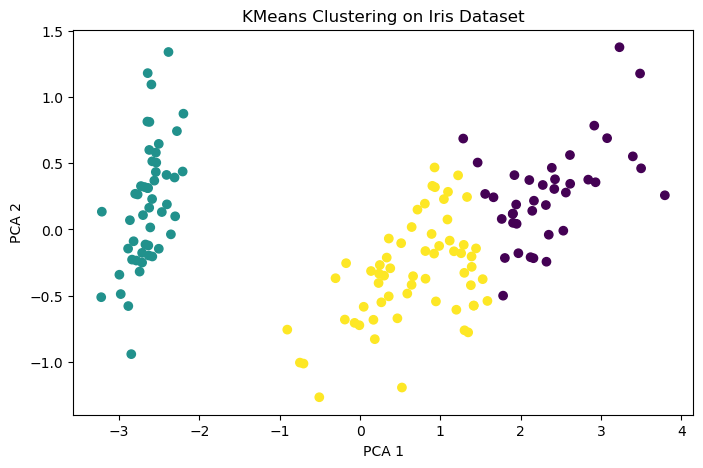

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(df)

# Visualize using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)

plt.figure(figsize=(8,5))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters_kmeans, cmap='viridis')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
#How Hierarchical Clustering Works
#Hierarchical clustering builds a tree of clusters (dendrogram). It starts with each point as its own cluster and merges the closest pairs step-by-step. It doesn’t require specifying the number of clusters beforehand.

# Why Suitable for Iris Dataset?
#Iris has a small number of samples (150), making it manageable for hierarchical clustering.

#We can observe natural groupings through the dendrogram

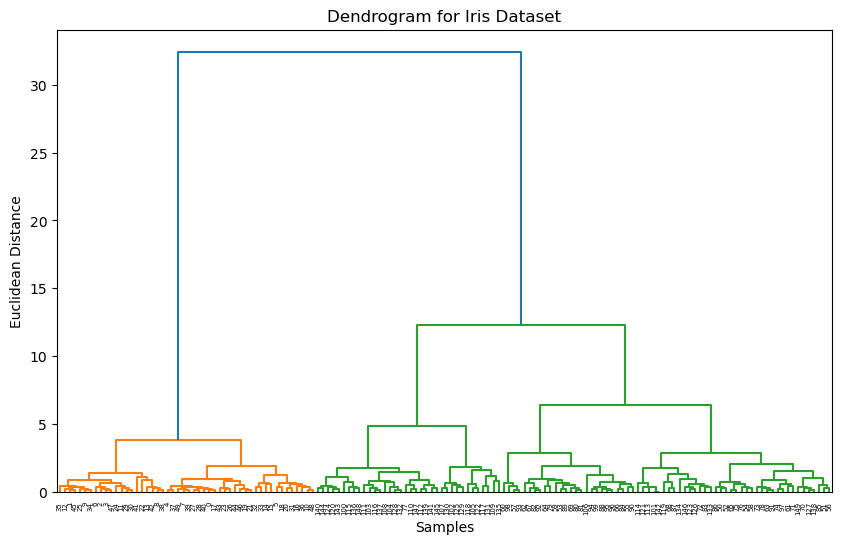

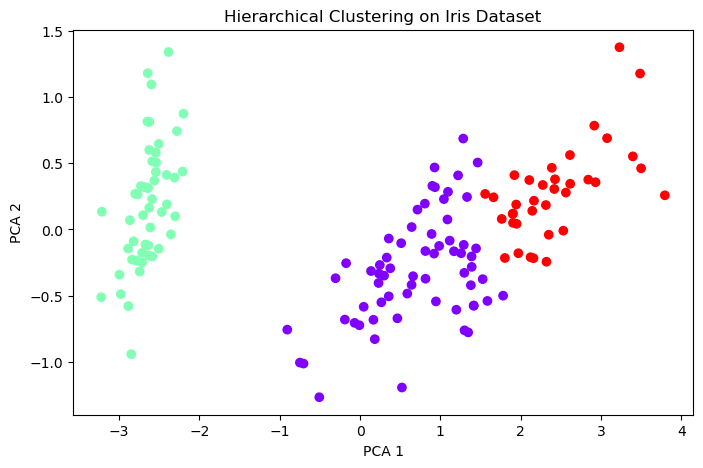

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(df, method='ward'))
plt.title("Dendrogram for Iris Dataset")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply Agglomerative Clustering

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(df)

# Visualize
plt.figure(figsize=(8,5))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters_hc, cmap='rainbow')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
